In [274]:
import matplotlib.pyplot as plt
import numpy as np

In [275]:
def get_simulated_trajectory_measurements(f, total_time, a, x_0, v, plot=None):
    # f is how many samples to take per second
    # T is the total time in which we are taking measurements
    timeframes_per_second = 100
    nr_timeframes = total_time * timeframes_per_second
    t = np.linspace(0, total_time, nr_timeframes)
    x = x_0[0] + v[0]*t
    y = x_0[1] + v[1]*t
    # 2D trajectory points
    trajectory = np.vstack((x,y)).T
    if plot:
        ax, color = plot
        ax.plot(x,y, color=color)

    skip = int(timeframes_per_second/f)
    timeframes = np.arange(0, nr_timeframes, skip)

    range_ = np.zeros(int(np.ceil(total_time*f)))
    range_rate_ = np.zeros(int(np.ceil(total_time*f)))

    for sample_nr in range(len(timeframes)):
        timeframe = timeframes[sample_nr]
        r_t = np.linalg.norm(a - trajectory[timeframe])
        u_t = (trajectory[timeframe] - a)/r_t
        s_t = np.inner(u_t, v)
        range_[sample_nr] = r_t
        range_rate_[sample_nr] = s_t
    return range_, range_rate_

In [292]:
def plot_cost_function(total_time, a, x_0_real, v_real, nu, plot_dim_x, plot_dim_y, delta):
    real_measurements = np.vstack(get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real))
    v_x = np.arange(*plot_dim_x, delta)
    v_y = np.arange(*plot_dim_y, delta)
    V_X, V_Y = np.meshgrid(v_x, v_y, indexing='ij')
    costs = []
    for i in range(len(v_x)):
        for j in range(len(v_y)):
            v_est = np.array((V_X[i,j], V_Y[i,j]))
            estimated_measurements = np.vstack(get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_est))
            error = real_measurements - estimated_measurements
            error_nu = np.ravel(np.multiply(error, np.array([[1], [np.sqrt(nu)]])))
            cost = np.linalg.norm(error_nu)
            costs.append(cost)
            if cost < 0.38:
                print(v_est, cost)
    Z = np.array(costs).reshape(V_X.shape)
    fig, ax = plt.subplots()
    CS = ax.contour(V_X, V_Y, Z, levels = 15, cmap='terrain')
    ax.clabel(CS, inline=True, fontsize=10) 

[ 0.005 -0.224] 0.37193281284516194
[ 0.006 -0.224] 0.1874758159644249
[ 0.006 -0.223] 0.16047788971287869
[ 0.099 -0.2  ] 0.3696103706737748
[ 0.1 -0.2] 1.1807905745706119e-13
[ 0.101 -0.2  ] 0.3719328128452965


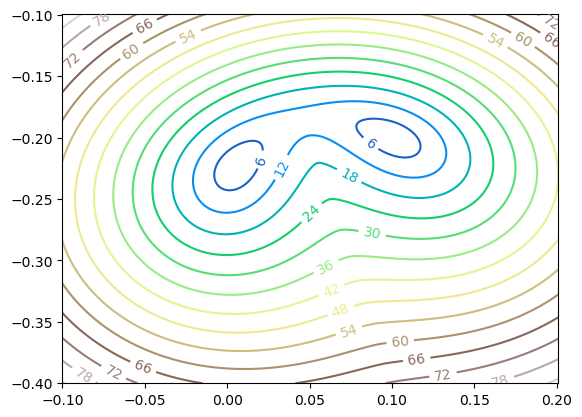

In [293]:
#Measurements
total_time = 100
a = np.array((5, 0))
x_0_real = np.array((0, 20))
v_real = np.array((0.1, -0.2))
#Plot parameters
nu = 1
delta = 0.001
plot_dim_x = (-0.1, 0.2 + delta)
plot_dim_y = (-0.4, -0.1 + delta)
plot_cost_function(total_time, a, x_0_real, v_real, nu, plot_dim_x, plot_dim_y, delta)

[-0.101 -0.201] 0.35241757058221396
[-0.1   -0.201] 0.32839112188561326
[-0.1 -0.2] 4.310199276104956e-14
[-0.1   -0.199] 0.3302473878620424
[-0.099 -0.199] 0.3478618472427208
[ 0.099 -0.199] 0.34786184724261093
[ 0.1   -0.201] 0.32839112188550984
[ 0.1 -0.2] 1.602617153877612e-13
[ 0.1   -0.199] 0.3302473878621472
[ 0.101 -0.201] 0.35241757058232487


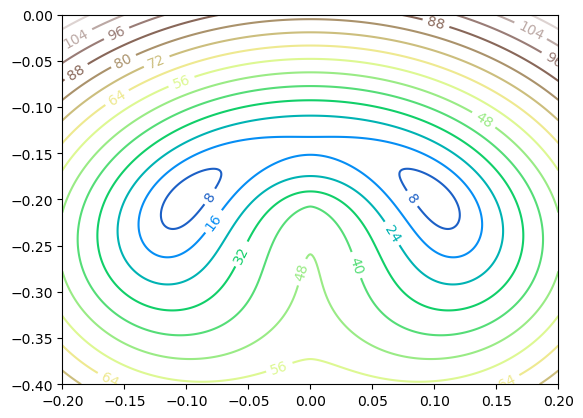

In [295]:
#Measurements
total_time = 100
a = np.array((0, 0))
x_0_real = np.array((0, 20))
v_real = np.array((0.1, -0.2))
real_measurements = np.vstack(get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real))
#Plot parameters
nu = 1
delta = 0.001
plot_dim_x = (-0.2, 0.2 + delta)
plot_dim_y = (-0.4, 0 + delta)
nu = 1
plot_cost_function(total_time, a, x_0_real, v_real, nu, plot_dim_x, plot_dim_y, delta)

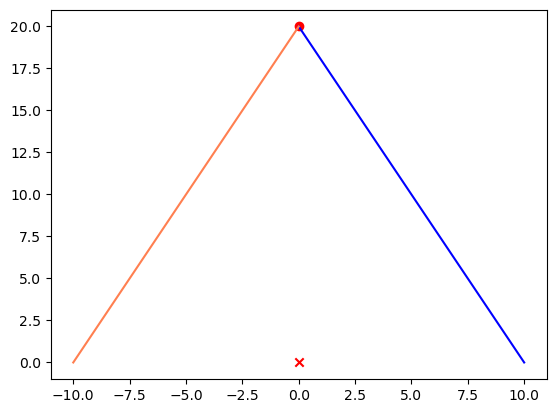

In [322]:
fig, ax = plt.subplots()
total_time = 100
a = np.array((0, 0))
x_0_real = np.array((0, 20))
v_real = np.array((0.1, -0.2))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax,'blue'))
v_real = np.array((-0.1, -0.2))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax, 'coral'))
ax.scatter(*a, c='red', marker='x')
ax.scatter(*x_0_real, c='red')

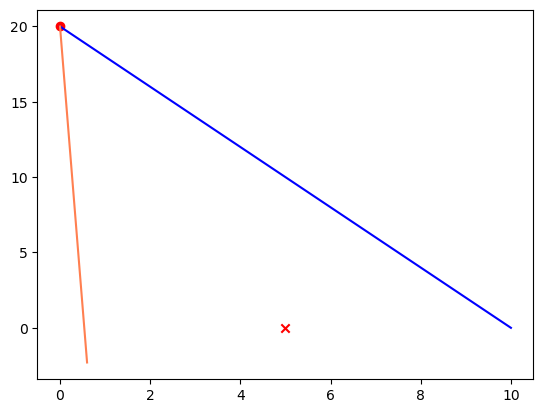

In [320]:
fig, ax = plt.subplots()
total_time = 100
a = np.array((5, 0))
x_0_real = np.array((0, 20))
v_real = np.array((0.1, -0.2))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax,'blue'))
v_real = np.array((0.006, -0.223))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax, 'coral'))
ax.scatter(*a, c='red', marker='x')
ax.scatter(*x_0_real, c='red')

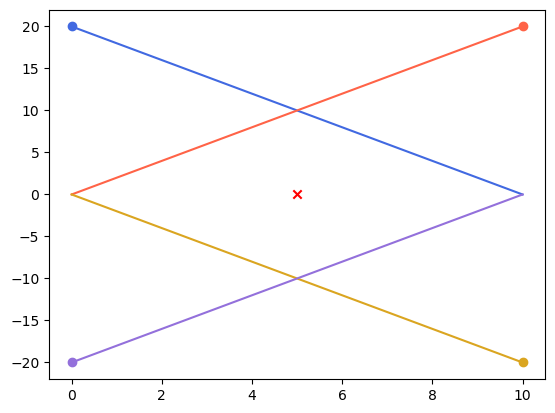

In [287]:
fig, ax = plt.subplots()
total_time = 100
a = np.array((5, 0))
ax.scatter(*a, c='red', marker='x')

color = 'royalblue'
x_0_real = np.array((0, 20))
ax.scatter(*x_0_real, c=color)
v_real = np.array((0.1, -0.2))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax, color))

color = 'tomato'
x_0_real = np.array((10, 20))
ax.scatter(*x_0_real, c=color)
v_real = np.array((-0.1, -0.2))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax, color))

color = 'goldenrod'
x_0_real = np.array((10, -20))
ax.scatter(*x_0_real, c=color)
v_real = np.array((-0.1, 0.2))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax, color))

color = 'mediumpurple'
x_0_real = np.array((0, -20))
ax.scatter(*x_0_real, c=color)
v_real = np.array((0.1, 0.2))
get_simulated_trajectory_measurements(1, total_time, a, x_0_real, v_real, plot=(ax, color))
None
